# **AUTOCORRELAÇÃO**

Autocorreção é uma coisa e correlação é outra

### Correlação linear: relação entre duas variáveis diferentes. 

### Aucorrelação: Analisando a correlação existente em um mesmo conjunto de dados, com a mesma variável. 



autocorrelação no mesmo conjunto de dados

correlação entre uma variável e segunda variável. 


Na autocorrelação, vamos verificar se existe uma correlação nos próprios dados.

Quando existe autocorrelação entre a nossa série de dados na mesma variável, as vezes a série não seja tão interessante assim. Não exatamente a autocorrelação dos dados, mas sima a autocorrelação que pode ocorrer nos resíduos. Porém, vamos ver com calma. 


Futuramente, verificaremos, como isso se aplicará no modelo. 

### **Primeiro caso: dados aleatórios normalizados**

In [2]:
# biblioteca 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [7]:
# semente aleatória número 6
# computar 72 valores, como uma média igual a 0 e um desvio padrão de 1.
# distrubuição aletatória aproximadamente normal. 
np.random.seed(6)
dados1 = np.random.normal(0,1,72)
dados1

array([-0.31178367,  0.72900392,  0.21782079, -0.8990918 , -2.48678065,
        0.91325152,  1.12706373, -1.51409323,  1.63929108, -0.4298936 ,
        2.63128056,  0.60182225, -0.33588161,  1.23773784,  0.11112817,
        0.12915125,  0.07612761, -0.15512816,  0.63422534,  0.810655  ,
        0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384,
       -1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953,
       -0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143,
       -0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059,
        1.38503523, -0.51962709, -0.78015214,  0.95560959, -0.12673638,
       -1.36861282,  1.21848065, -0.85750144, -0.56147088, -1.0335199 ,
        0.35877096,  1.07368134, -0.37550472,  0.39636757, -0.47144628,
        2.33660781,  1.50278553, -0.59545972,  0.52834106,  0.9398248 ,
        0.42628539, -0.75815703, -0.16236698,  0.72680996,  0.44408297,
       -0.85682264,  0.44692842, -1.01464799, -2.1323234 ,  0.17

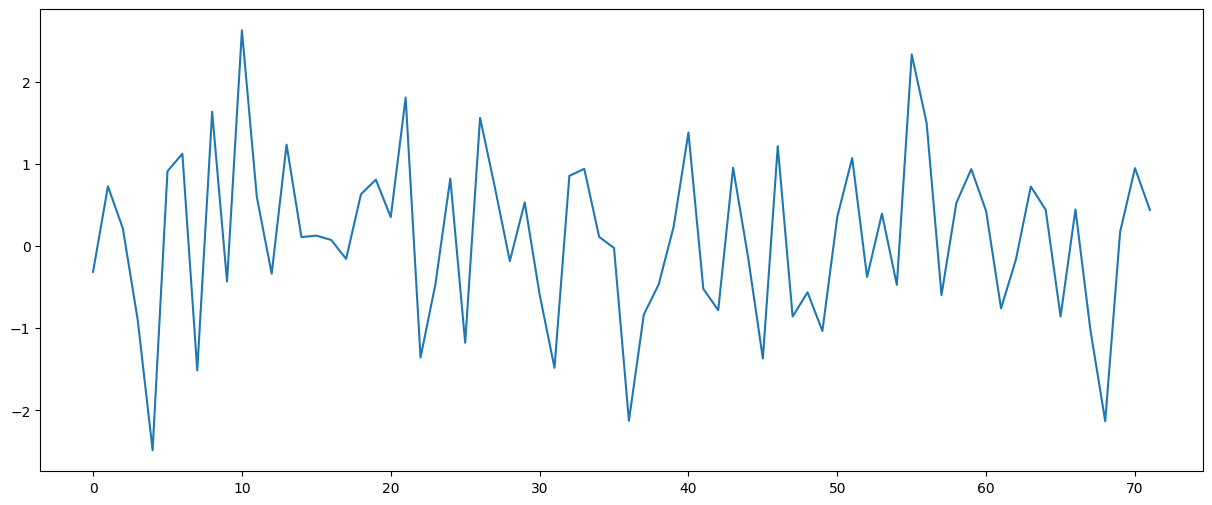

In [8]:
serie = pd.Series(dados1)
serie.plot()
plt.show()

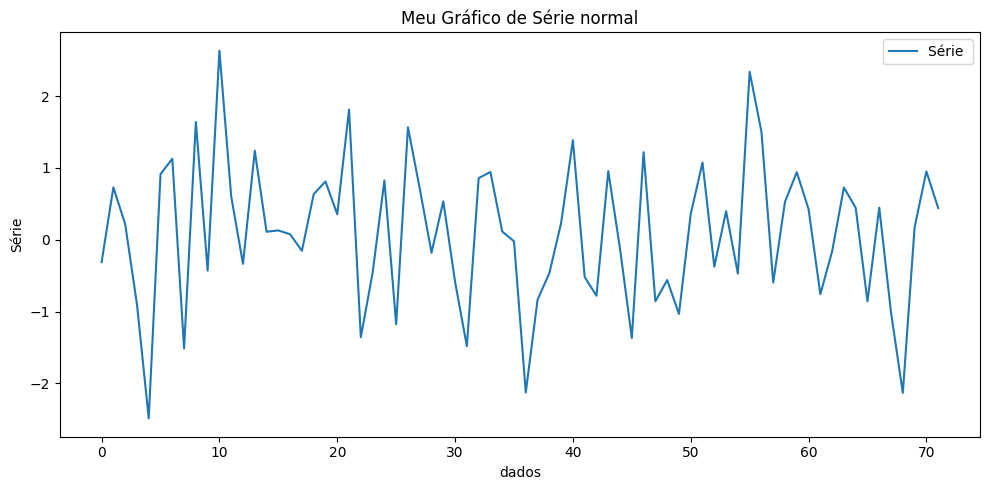

In [10]:
# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série
plt.plot(serie, label="Série ")

# Adicionando um título ao gráfico
plt.title("Meu Gráfico de Série normal")

# Definindo rótulos dos eixos
plt.xlabel("dados")
plt.ylabel("Série")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=0)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## Objetivo é a autocorrelação

plot_acf é a função de autocorrelação => dados na sequência

plot_pacf é a função de autocorrelação parcial => dados aleatórios

chamamos de lags

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Configuraremos os números de lags, o primeiro sempre é o padrão, até o valor 1. O primeiro é o de referência.

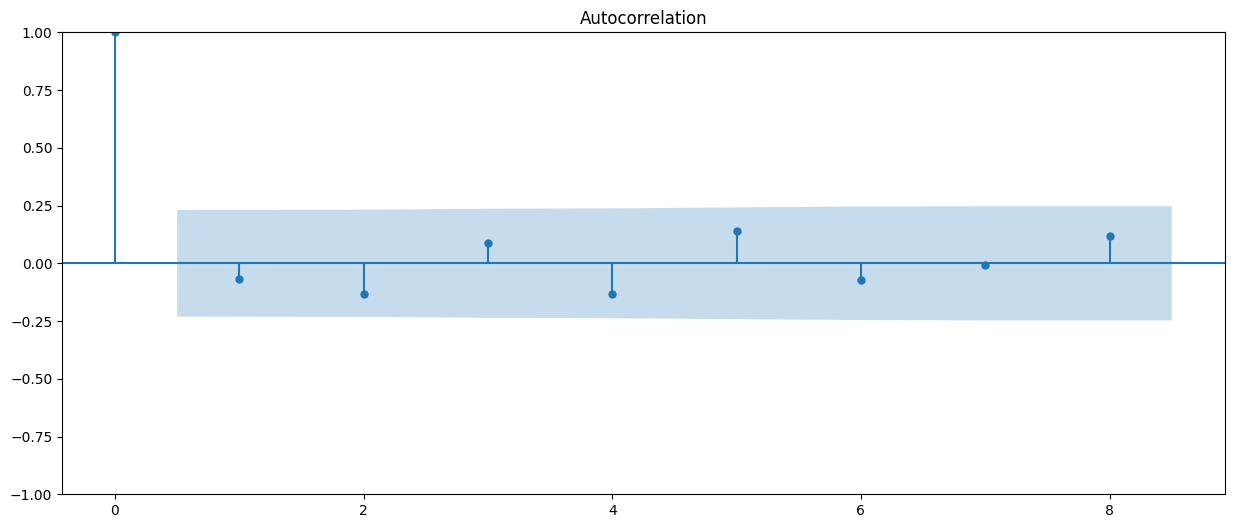

In [12]:
#criaremos 8 lags
plot_acf(serie, lags=8)
plt.show()

Configuraremos os números de lags, o primeiro sempre é o padrão, até o valor 1 no eixo y, e o no eixo x =0.


As demais barras são lags, verifica todos os períodos, que estão na faixa em azul, que é a faixa de confiança. Dentro da faixa de confiança, indicando que não existe autocorrelação. 

Isso é muito bom, onde a autocorrelação não está presente, cria o modelo onde os resíduos, que vamos verificar. Ou seja, <b>Quando não há autocorrelação é sinal de que o modelo está bem adequado</b>. 


Analisamos os dados das séries, no caso não possui autocorrelação, o que é bom. Vamos colocar mais lags. 

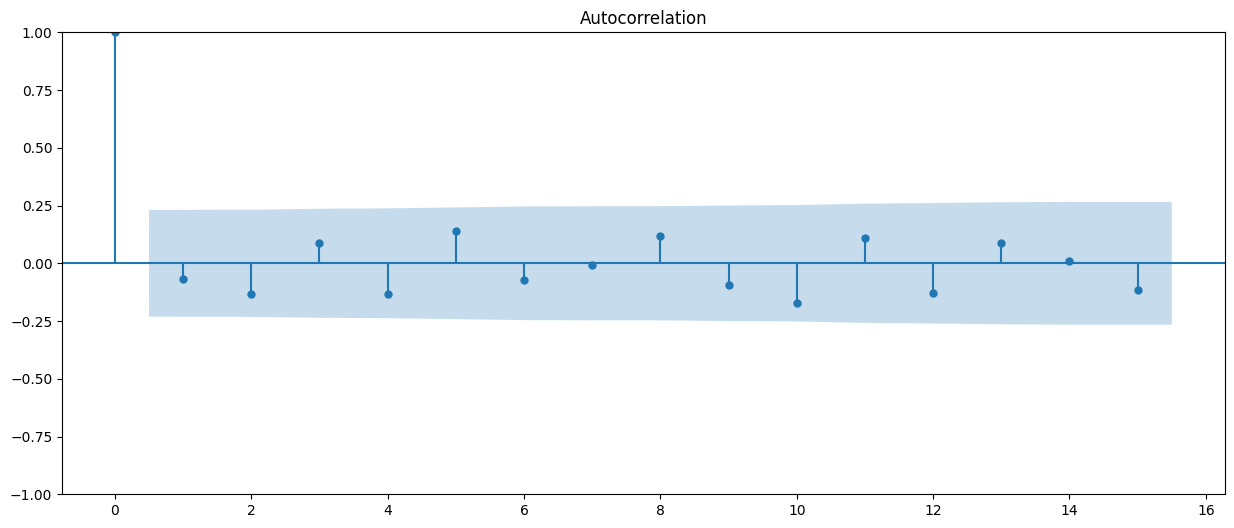

In [14]:

#criaremos 15 lags
plot_acf(serie, lags=15)
plt.show()

#### No PACF o diagram não analisa automaticamente os dados anteriores e posteriores. E analisa o terceiro com o oitavo, o quarto com o quinto. E assim faz uma análise geral. 


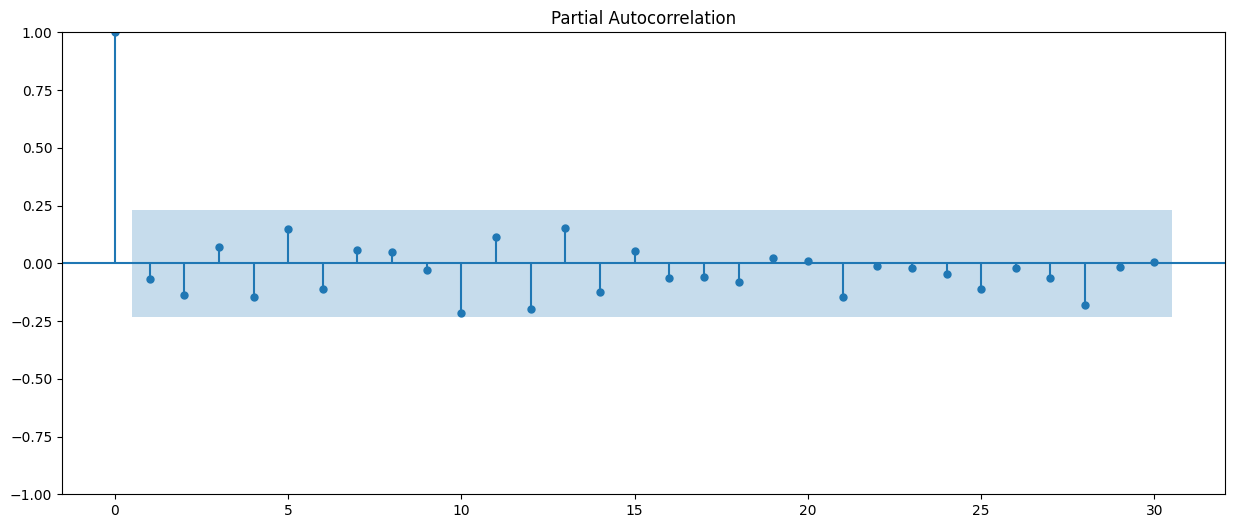

In [16]:
# colocaremos para analisar os 30 lags
plot_pacf(serie, lags=30)
plt.show()



Há alguns, como o 10 lag, e o 12 está fora da linha de confiança, sendo a maioria dentro do limite de confiança. O que ainda indica que a série não é alto correlacionada. 



## Não são autocorrelacionadas:

nem sendo:

ACF = analisando um posteriormente ao outro e 

nem analisando isso de forma intercalada = PACF.

Caso: Se tivermos uma grande quantidade 5 a 10% fora do intervalo de confiança, assim existiria uma autocorrelação dos dados.   

### **Segundo caso: dados externos de Manchas solares**

**Número médio mensal de manchas solares relativas de 1749 a 1983. Coletados no Observatório Federal Suíço, Zurique até 1960, e depois no Observatório Astronômico de Tóquio..**
 


Manchas solares: Regiões que ocorrem no sol que há uma temperatura menor, deido a uma variação de campo magnético. Obtém manchas mais escuras e ocorrem de tempos e tempos. Isso é importante para analisar a influência climática que isso ocorre na terra. 

Os números médios mensais de manchas solares, fonte da Suíça e do Japão.

In [19]:
dados2 = pd.read_csv('sunspots.csv')

In [22]:
# número médio mensais de manchas solares relativas, por isso podem parecer valores percentuais ou percentual
# há 2820 registros.
dados2

,x
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0
...,...
2816,71.8
2817,50.3
2818,55.8
2819,33.3


In [24]:
dados2.columns = ['valores']
dados2.head()
# o ideal é aparecer o 0 no primeiro índice, por isso vamos dar o reset

,valores
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0


In [25]:
dados2 = dados2.reset_index(drop=True) # drop é para excluir o índice anterior e resetar  o índice
dados2

,valores
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


# criaemos o índice de datas, começando com o ano de 1749, com uma frequência mensal (freq='M'), len(dados2) = quantidade de dados 2820. 

In [26]:
indice = pd.date_range('1749', periods = len(dados2), freq = 'M')
indice

/tmp/ipykernel_7836/1006738214.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  indice = pd.date_range('1749', periods = len(dados2), freq = 'M')


DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='ME')

In [27]:
# criaremos a nossa série
serie2 = pd.Series(dados2['valores'].values, index = indice)
display(serie2)

1749-01-31    58.0
1749-02-28    62.6
1749-03-31    70.0
1749-04-30    55.7
1749-05-31    85.0
              ... 
1983-08-31    71.8
1983-09-30    50.3
1983-10-31    55.8
1983-11-30    33.3
1983-12-31    33.4
Freq: ME, Length: 2820, dtype: float64

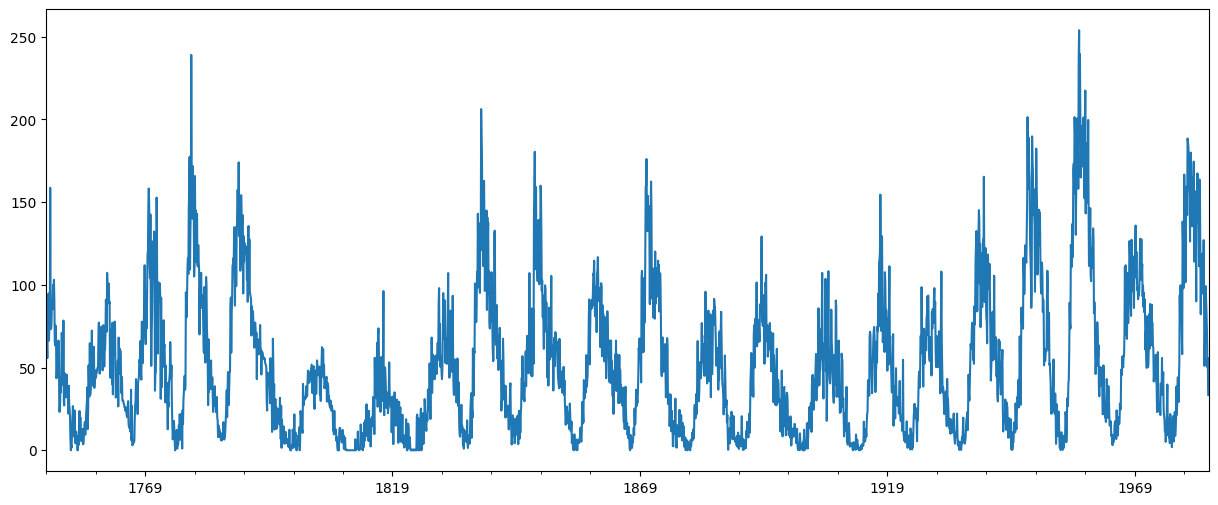

In [28]:
serie2.plot()
plt.show()

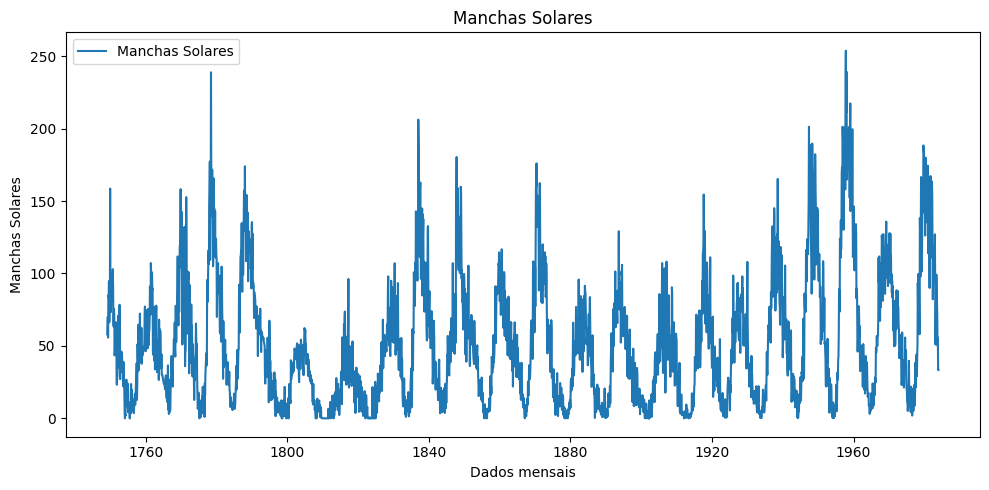

In [30]:
# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série
plt.plot(serie2, label="Manchas Solares")

# Adicionando um título ao gráfico
plt.title("Manchas Solares")

# Definindo rótulos dos eixos
plt.xlabel("Dados mensais")
plt.ylabel("Manchas Solares")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=0)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

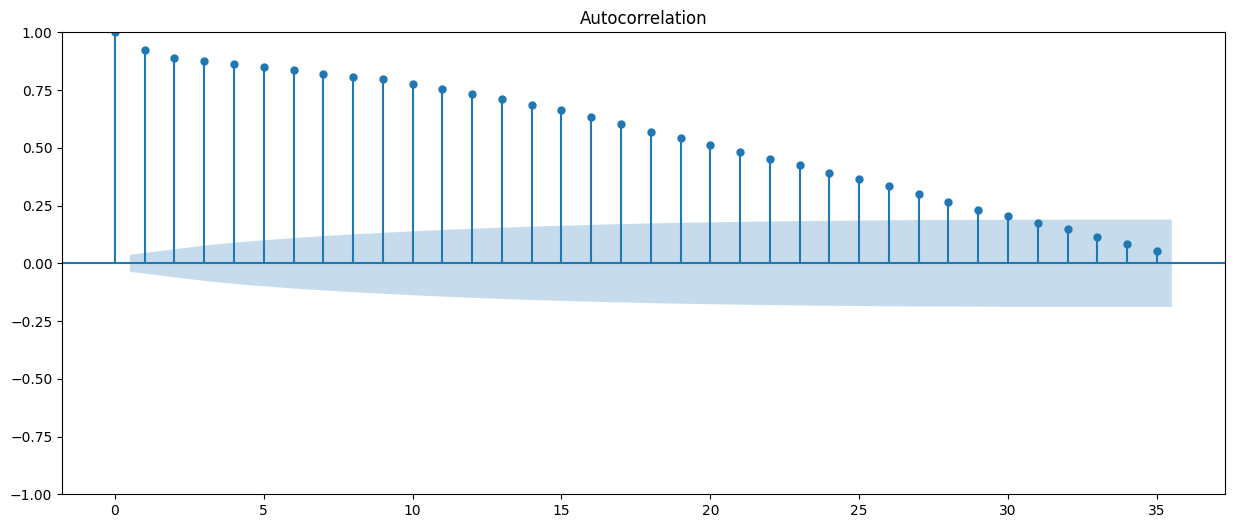

In [31]:
plot_acf(serie2)
plt.show()


A maioria do lag está fora da faixa em azul, do intervalo de confiança, o que indicam que os dados estão <b>autocorrelacionados</b>. 
Normalmente não é legal montar o modelo, mas não é proibido. 

Melhor termos um modelo que não atende alguns pressupostos, do que não ter nada. 

vamos usar a autocorrelação nos resíduos. 

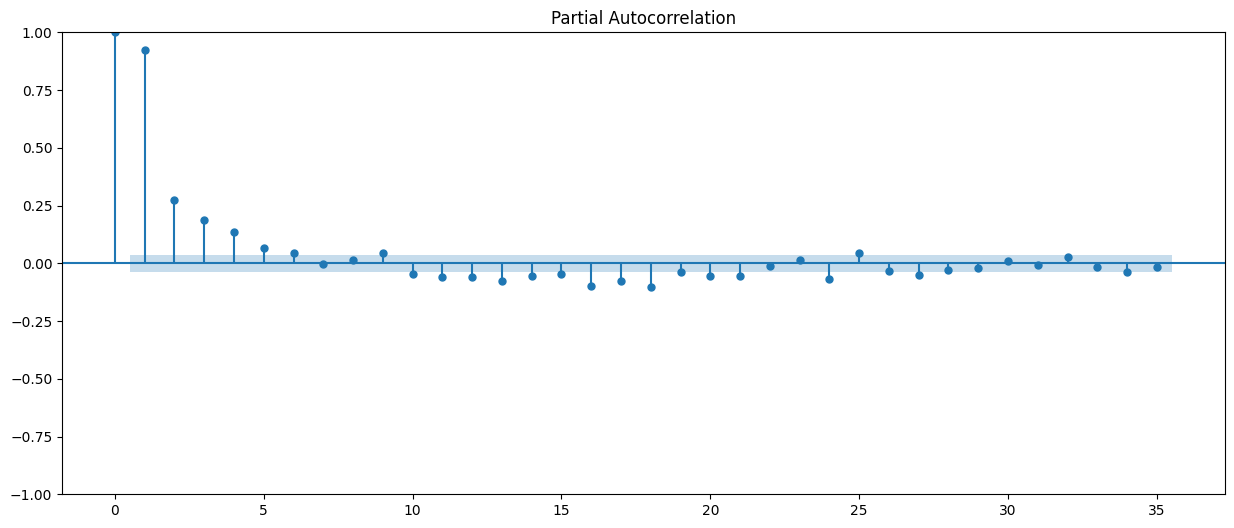

In [32]:
plot_pacf(serie2)
plt.show()


No PACF verificamos que os dados fora da linha azul indicam autocorrelação, positivas mais no começo das lags, e negativas ao longo das lags. 

### Positivo e vai para o negativo a autocorrelação: Comum em dados em que há uma grande sazonalidade, uma repetição de valores por períodos.

### **Terceiro caso: dados do Python sobre Manchas solares**

Dados anuais (1700-2008) sobre manchas solares.
Fonte: National Geophysical Data Center.

In [33]:
import statsmodels.api as sm

https://www.statsmodels.org/devel/datasets/index.html 

### dados anuais direto do próprio Python

In [34]:
# Importação do Dataset Manchas Solares do Python
manchas_solares = sm.datasets.sunspots.load_pandas().data
manchas_solares # valores anuais do sunspots

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [35]:
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = manchas_solares['YEAR'])
serie3

YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
          ... 
2004.0    40.4
2005.0    29.8
2006.0    15.2
2007.0     7.5
2008.0     2.9
Length: 309, dtype: float64

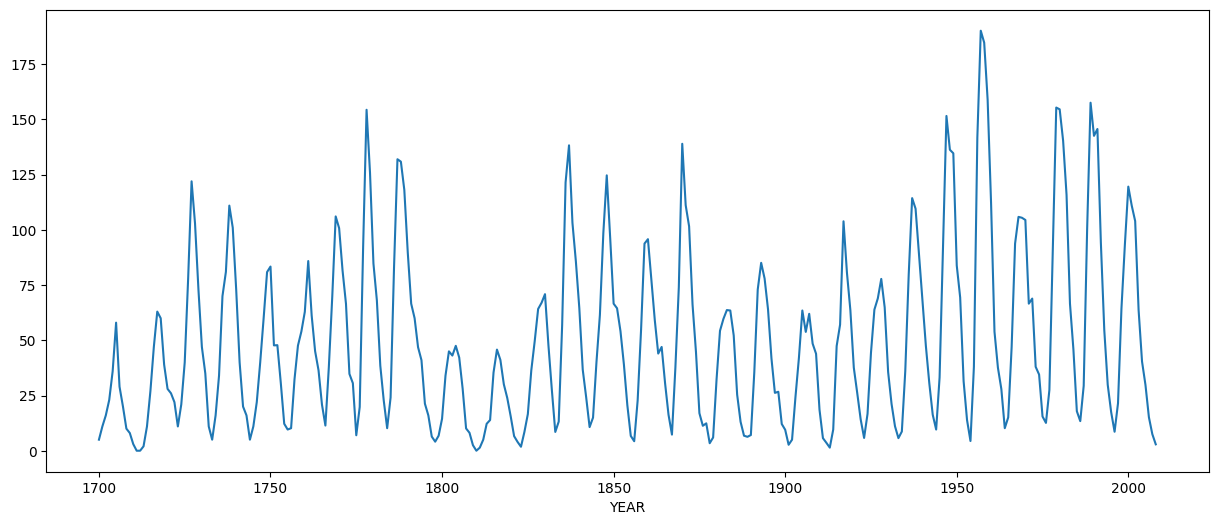

In [36]:
serie3.plot();

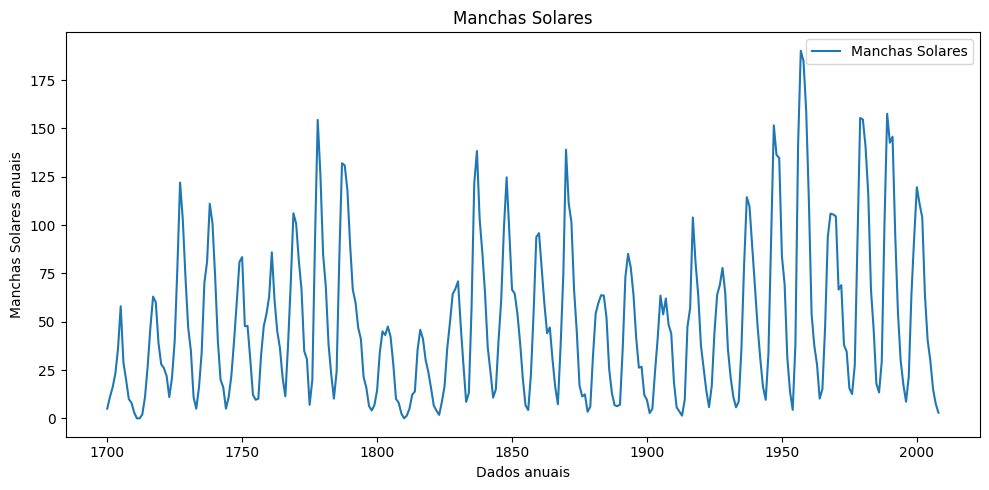

In [37]:
# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série
plt.plot(serie3, label="Manchas Solares")

# Adicionando um título ao gráfico
plt.title("Manchas Solares")

# Definindo rótulos dos eixos
plt.xlabel("Dados anuais")
plt.ylabel("Manchas Solares anuais")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=0)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

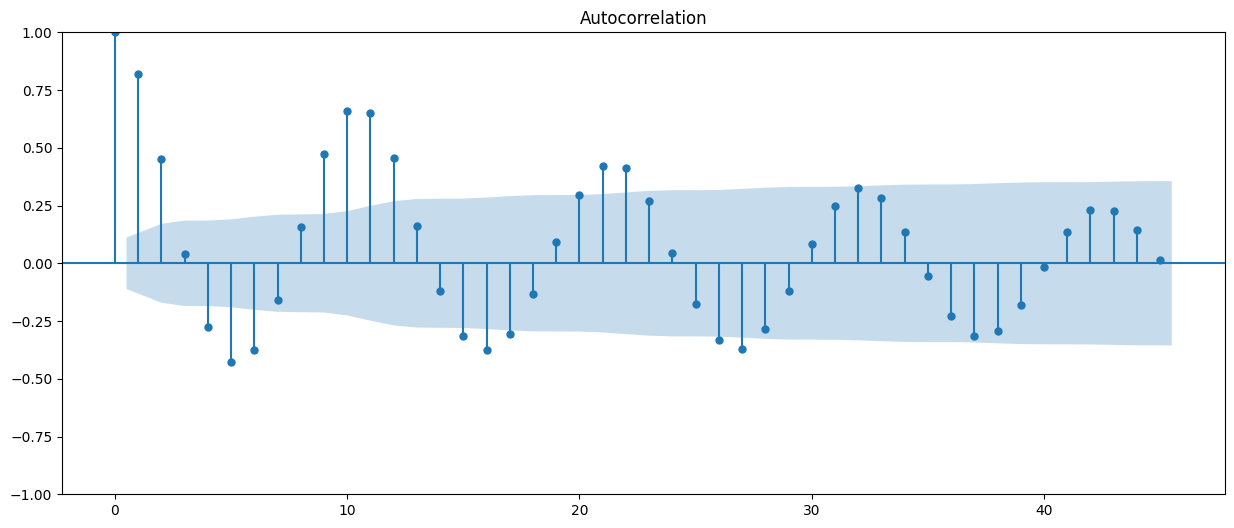

In [39]:
plot_acf(serie3, lags=45)
plt.show()

Bem mais evidente da autocorrelação positiva e negativa, inversão. Os lags iniciais são autocorrelação, tanto positivo quanto negativo, mas no final ficam dentro da linha de confiança. 


A analise inicial dos dados acf é sempre mais importante que os dados finais da lag. 

ACF são análises de dados na sequência.

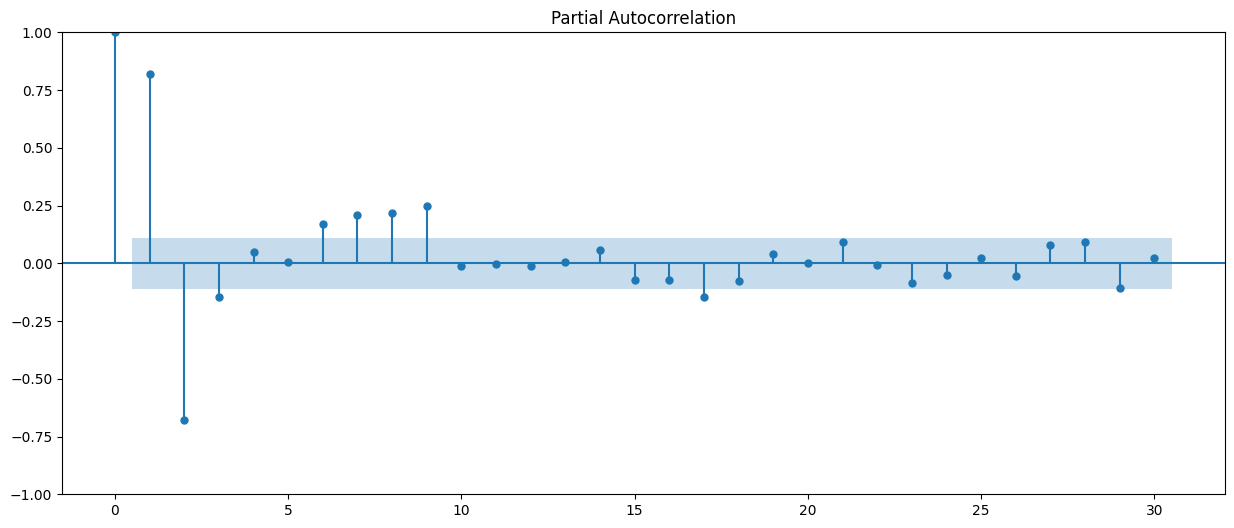

In [40]:
plot_pacf(serie3, lags=30)
plt.show()

O PACF faz uma análise de correlação de maneira dispersa. Percebe uma <b>autocorelação entre os valores</b>, com dados fora da linha azul de confiança, mesmo sendo poucos, no início. 